**Title: Exploratory Data Analysis (EDA) of Car Dekho Dataset**

**Description:**
The "Exploratory Data Analysis (EDA) of Car Dekho Dataset" notebook is a comprehensive analysis of a dataset containing information about used cars listed on Car Dekho, an online marketplace. This notebook provides a step-by-step exploration of the dataset to gain insights into various aspects of the used car market, including car features, prices, and factors influencing car resale value.

**Key Components:**

1. **Data Loading and Overview:**
   - Load the Car Dekho dataset, which includes features such as car make, model, year of manufacture, mileage, fuel type, seller type, and selling price.
   - Provide an overview of the dataset, including the number of records, data types, and summary statistics.

2. **Data Cleaning and Preprocessing:**
   - Handle missing values, duplicate entries, and outliers in the dataset to ensure data quality and integrity.
   - Perform feature engineering tasks such as encoding categorical variables and scaling numerical features as needed.

3. **Exploratory Data Analysis (EDA):**
   - Explore the distribution of car features such as mileage, year of manufacture, and selling price through histograms, box plots, and density plots.
   - Analyze relationships between different features using scatter plots, pair plots, and correlation matrices to identify patterns and trends.

4. **Price Analysis:**
   - Investigate factors influencing car prices, such as car make, model, year of manufacture, mileage, and fuel type.
   - Visualize price distributions and conduct statistical tests to compare price differences across different categories.

5. **Feature Importance Analysis:**
   - Determine the importance of different features in predicting car prices using techniques like feature importance scores from machine learning models or statistical tests.

6. **Insights and Recommendations:**
   - Summarize key findings and insights derived from the EDA process, including factors influencing car prices and market trends.
   - Provide recommendations for buyers and sellers based on the analysis to make informed decisions in the used car market.

**Note:**
The "Exploratory Data Analysis (EDA) of Car Dekho Dataset" notebook serves as a valuable resource for understanding the dynamics of the used car market and extracting actionable insights from the dataset. By performing thorough data exploration and analysis, it enables stakeholders to make informed decisions regarding car purchases, sales, and pricing strategies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv(r"CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
df.shape

(4340, 8)

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df.describe()

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [8]:
df.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [9]:
df.tail()

name  year  selling_price  km_driven  \
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner  
4335  Diesel  Individual       Manual  Second Owner  
4336  Diesel  Individual       Manual  Second Owner  
4337  Petrol  Individual       Manual  Second Owner  
4338  Diesel  Individual       Manual   First Owner  
4339  Petrol  Individual       Manual   First Owner

In [10]:
df.isnull()

name   year  selling_price  km_driven   fuel  seller_type  \
0     False  False          False      False  False        False   
1     False  False          False      False  False        False   
2     False  False          False      False  False        False   
3     False  False          False      False  False        False   
4     False  False          False      False  False        False   
...     ...    ...            ...        ...    ...          ...   
4335  False  False          False      False  False        False   
4336  False  False          False      False  False        False   
4337  False  False          False      False  False        False   
4338  False  False          False      False  False        False   
4339  False  False          False      False  False        False   

      transmission  owner  
0            False  False  
1            False  False  
2            False  False  
3            False  False  
4            False  False  
...            ...    ...  
4335         False  False  
4336         False  False  
4337         False  False  
4338         False  False  
4339         False  False  

[4340 rows x 8 columns]

In [11]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [12]:
df["Age"] = 2022 - df["year"]

In [13]:
df.drop('year',axis=1,inplace=True)

In [14]:
df.head()

name  selling_price  km_driven    fuel seller_type  \
0             Maruti 800 AC          60000      70000  Petrol  Individual   
1  Maruti Wagon R LXI Minor         135000      50000  Petrol  Individual   
2      Hyundai Verna 1.6 SX         600000     100000  Diesel  Individual   
3    Datsun RediGO T Option         250000      46000  Petrol  Individual   
4     Honda Amaze VX i-DTEC         450000     141000  Diesel  Individual   

  transmission         owner  Age  
0       Manual   First Owner   15  
1       Manual   First Owner   15  
2       Manual   First Owner   10  
3       Manual   First Owner    5  
4       Manual  Second Owner    8

In [15]:
pd.set_option("display.max_rows",None,"display.max_columns",None)

In [16]:
df

name  selling_price  \
0                                         Maruti 800 AC          60000   
1                              Maruti Wagon R LXI Minor         135000   
2                                  Hyundai Verna 1.6 SX         600000   
3                                Datsun RediGO T Option         250000   
4                                 Honda Amaze VX i-DTEC         450000   
5                                  Maruti Alto LX BSIII         140000   
6                             Hyundai Xcent 1.2 Kappa S         550000   
7                              Tata Indigo Grand Petrol         240000   
8                              Hyundai Creta 1.6 VTVT S         850000   
9                              Maruti Celerio Green VXI         365000   
10                              Chevrolet Sail 1.2 Base         260000   
11                             Tata Indigo Grand Petrol         250000   
12                      Toyota Corolla Altis 1.8 VL CVT        1650000   
13                                        Maruti 800 AC          60000   
14                             Maruti Wagon R LXI Minor         135000   
15                                 Hyundai Verna 1.6 SX         600000   
16                               Datsun RediGO T Option         250000   
17                                Honda Amaze VX i-DTEC         450000   
18                                 Maruti Alto LX BSIII         140000   
19                            Hyundai Xcent 1.2 Kappa S         550000   
20                             Tata Indigo Grand Petrol         240000   
21                             Hyundai Creta 1.6 VTVT S         850000   
22                             Maruti Celerio Green VXI         365000   
23                              Chevrolet Sail 1.2 Base         260000   
24                             Tata Indigo Grand Petrol         250000   
25                      Toyota Corolla Altis 1.8 VL CVT        1650000   
26                                 Maruti Ciaz VXi Plus         585000   
27                          Hyundai Venue SX Opt Diesel        1195000   
28                    Chevrolet Enjoy TCDi LTZ 7 Seater         390000   
29                           Jaguar XF 2.2 Litre Luxury        1964999   
30                 Mercedes-Benz New C-Class 220 CDI AT        1425000   
31                    Maruti Vitara Brezza ZDi Plus AMT         975000   
32                                      Audi Q5 2.0 TDI        1190000   
33                                      Honda City V MT         930000   
34                           Tata Tigor 1.2 Revotron XT         525000   
35                      Audi A6 2.0 TDI  Design Edition        1735000   
36       Mercedes-Benz New C-Class C 220 CDI Avantgarde        1375000   
37                  Skoda Superb Ambition 2.0 TDI CR AT         450000   
38                            Toyota Corolla Altis G AT         900000   
39                Toyota Innova 2.5 G (Diesel) 7 Seater        1300000   
40                     Jeep Compass 1.4 Sport Plus BSIV        1400000   
41             Mercedes-Benz E-Class E 200 CGI Elegance         850000   
42                               Hyundai i10 Magna 1.1L         229999   
43                         BMW 3 Series 320d Sport Line        1550000   
44                       Audi Q7 35 TDI Quattro Premium        1250000   
45                               Hyundai Elantra CRDi S         625000   
46                            Mahindra Scorpio 1.99 S10        1050000   
47                                  Honda City i DTEC V         560000   
48                    Maruti Wagon R VXI BS IV with ABS         290000   
49                             Maruti Wagon R VXI BS IV         275000   
50                                  Mahindra Scorpio LX         411000   
51                              Hyundai Santro Xing GLS         150000   
52                     Hyundai Grand i10 1.2 Kappa Asta         500000   
53                                      Maruti Alto LXi

In [17]:
df.describe()

selling_price      km_driven          Age
count   4.340000e+03    4340.000000  4340.000000
mean    5.041273e+05   66215.777419     8.909217
std     5.785487e+05   46644.102194     4.215344
min     2.000000e+04       1.000000     2.000000
25%     2.087498e+05   35000.000000     6.000000
50%     3.500000e+05   60000.000000     8.000000
75%     6.000000e+05   90000.000000    11.000000
max     8.900000e+06  806599.000000    30.000000

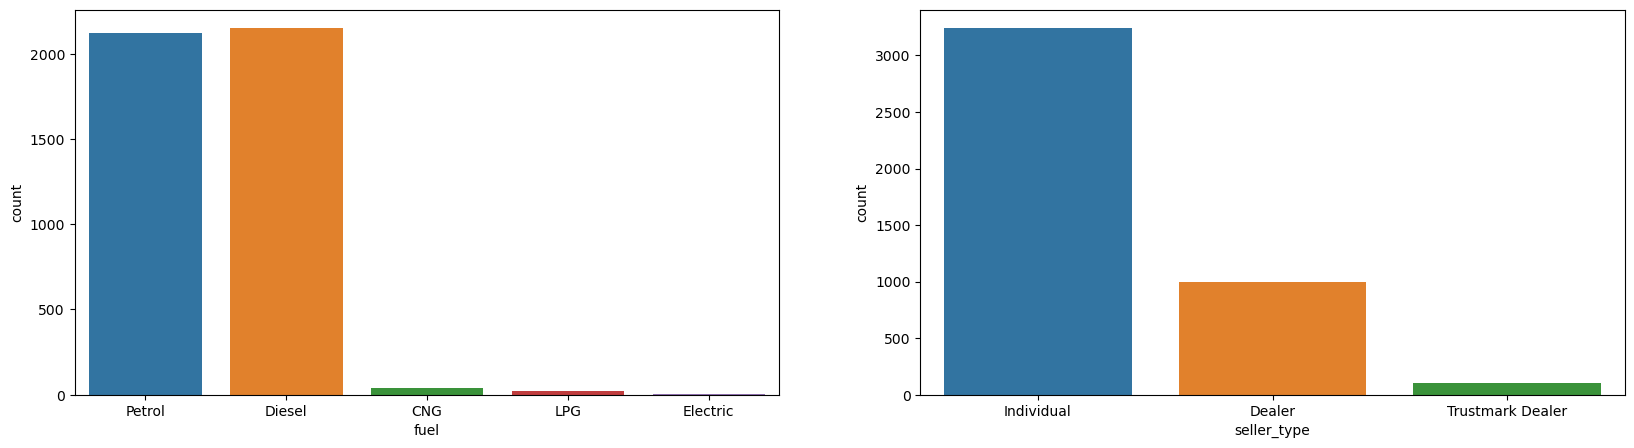

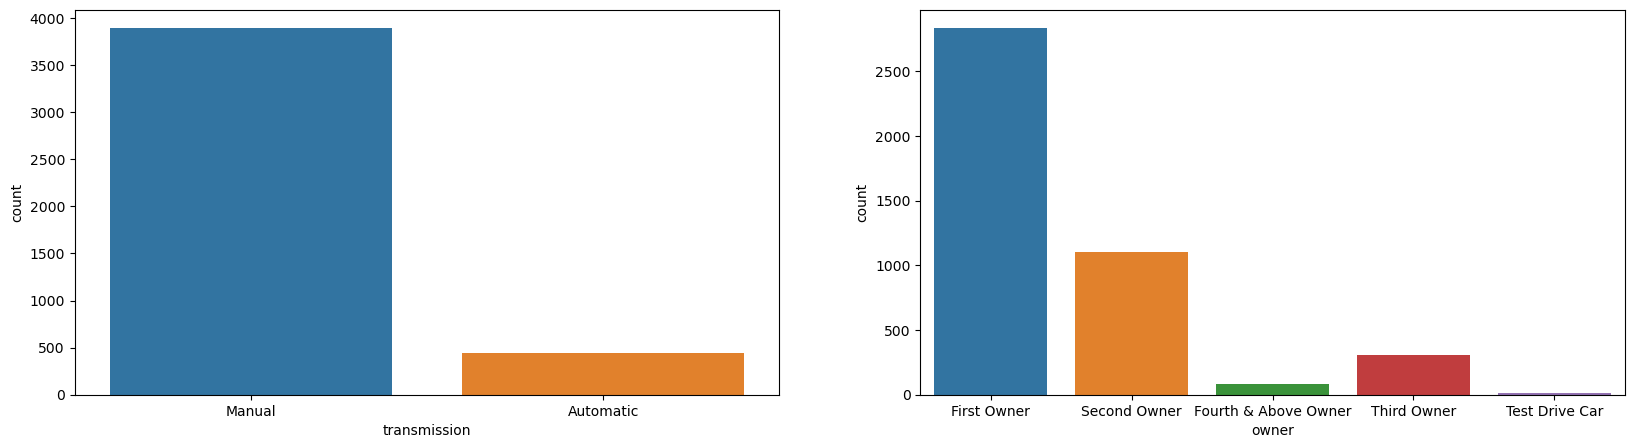

In [18]:
cat_col = ["fuel","seller_type","transmission","owner"]
i = 0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_col[i],data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_col[i],data=df)
    i+=1
    
    plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   Age            4340 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


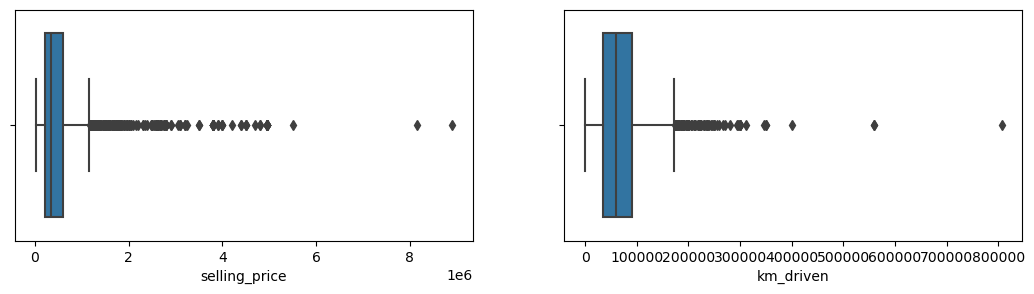

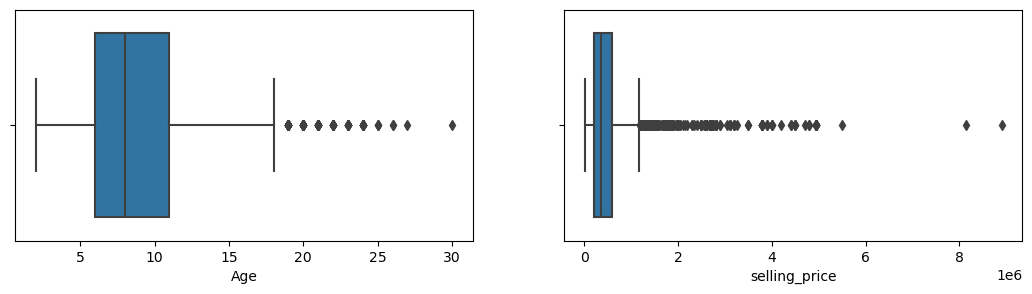

In [20]:
num_cols = ['selling_price','km_driven','Age','selling_price']
i = 0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i],data =df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i],data=df)
    i+=1
    
    plt.show()

In [21]:
df["selling_price"].quantile(0.99)

3200000.0

Outliers selling price

In [22]:
df[df["selling_price"]>df['selling_price'].quantile(.99)].sort_values(by="selling_price",ascending=False)

name  selling_price  \
3872           Audi RS7 2015-2019 Sportback Performance        8900000   
89    Mercedes-Benz S-Class S 350d Connoisseurs Edition        8150000   
3969            Mercedes-Benz GLS 2016-2020 350d 4MATIC        5500000   
612                             BMW X5 xDrive 30d xLine        4950000   
1836                            BMW X5 xDrive 30d xLine        4950000   
2258                            BMW X5 xDrive 30d xLine        4950000   
1023                            BMW X5 xDrive 30d xLine        4950000   
2739                            BMW X5 xDrive 30d xLine        4950000   
919                             BMW X5 xDrive 30d xLine        4950000   
2239                            BMW X5 xDrive 30d xLine        4950000   
900                             BMW X5 xDrive 30d xLine        4950000   
593                             BMW X5 xDrive 30d xLine        4950000   
574                             BMW X5 xDrive 30d xLine        4950000   
555                             BMW X5 xDrive 30d xLine        4950000   
3453                      BMW 5 Series 520d Luxury Line        4800000   
3883                      BMW 5 Series 520d Luxury Line        4800000   
963                                   Audi A5 Sportback        4700000   
101          Mercedes-Benz E-Class Exclusive E 200 BSIV        4500000   
2580         Mercedes-Benz E-Class Exclusive E 200 BSIV        4500000   
4047                    Volvo XC 90 D5 Inscription BSIV        4500000   
539      Mercedes-Benz GL-Class 350 CDI Blue Efficiency        4400000   
2178     Mercedes-Benz GL-Class 350 CDI Blue Efficiency        4400000   
3875     Land Rover Range Rover 4.4 Diesel LWB Vogue SE        4200000   
731               Land Rover Discovery Sport TD4 HSE 7S        4000000   
968                        BMW 7 Series Signature 730Ld        4000000   
988                      Land Rover Discovery S 2.0 SD4        4000000   
2295                 Audi Q5 3.0 TDI Quattro Technology        3899000   
4304                 Audi Q5 3.0 TDI Quattro Technology        3899000   
2237           Mercedes-Benz C-Class Progressive C 220d        3800000   
2256           Mercedes-Benz C-Class Progressive C 220d        3800000   
1834           Mercedes-Benz C-Class Progressive C 220d        3800000   
2737           Mercedes-Benz C-Class Progressive C 220d        3800000   
1021           Mercedes-Benz C-Class Progressive C 220d        3800000   
917            Mercedes-Benz C-Class Progressive C 220d        3800000   
898            Mercedes-Benz C-Class Progressive C 220d        3800000   
610            Mercedes-Benz C-Class Progressive C 220d        3800000   
591            Mercedes-Benz C-Class Progressive C 220d        3800000   
572            Mercedes-Benz C-Class Progressive C 220d        3800000   
553            Mercedes-Benz C-Class Progressive C 220d        3800000   
1705                                    Audi Q5 2.0 TDI        3500000   
1088          Land Rover Discovery Sport SD4 HSE Luxury        3500000   
1479                        Audi A4 35 TDI Premium Plus        3256000   

      km_driven    fuel seller_type transmission         owner  Age  
3872      13000  Petrol      Dealer    Automatic   First Owner    6  
89         6500  Diesel      Dealer    Automatic   First Owner    5  
3969      77350  Diesel      Dealer    Automatic   First Owner    6  
612       30000  Diesel      Dealer    Automatic   First Owner    3  
1836      30000  Diesel      Dealer    Automatic   First Owner    3  
2258      30000  Diesel      Dealer    Automatic   First Owner    3  
1023      30000  Diesel      Dealer    Automatic   First Owner    3  
2739      30000  Diesel      Dealer    Automatic   First Owner    3  
919       30000  Diesel      Dealer    Automatic   First Owner    3  
2239      30000  Diesel      Dealer    Automatic   First Owner    3  
900       30000  Diesel      Dealer    Automatic   First Owner    3  
593       30000  Diesel     

Dataset has premium cars with highest selling price 89L

In [23]:
df[df["km_driven"]>df["km_driven"].quantile(.99)].sort_values(by="km_driven",ascending=False)

name  selling_price  km_driven  \
1243                         Maruti Swift VXI BSIII         250000     806599   
4184              Maruti SX4 S Cross DDiS 320 Delta         665000     560000   
525               Maruti SX4 S Cross DDiS 320 Delta         665000     560000   
3679    Toyota Innova 2.5 G (Diesel) 7 Seater BS IV         400000     400000   
69    Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII         280000     350000   
2394            Toyota Innova 2.5 V Diesel 8-seater         350000     350000   
3718                Toyota Innova 2.5 GX 8 STR BSIV         420000     347089   
1674           Volkswagen Jetta 2.0 TDI Comfortline         350000     312000   
1101                                Tata Indica DLS          85000     300000   
3994                          Tata Indica GLS BS IV          75000     300000   
3898                          Tata Indica GLS BS IV          90000     300000   
1659    Toyota Innova 2.5 G (Diesel) 8 Seater BS IV         229999     300000   
3646    Toyota Innova 2.5 G (Diesel) 8 Seater BS IV         229999     300000   
2964                               Maruti Swift VDI         225000     296823   
3675                               Mahindra Xylo E9         300000     295000   
3979                   Mahindra Verito 1.5 D2 BSIII         150000     280000   
2961                 Mahindra Scorpio VLS 2.2 mHawk         300000     270000   
2401         Toyota Innova 2.5 E Diesel MS 7-seater         665000     267000   
3171                         Maruti Swift Dzire VDI         450000     260000   
4208                            Toyota Qualis FS B3         150000     256000   
2402                      Mahindra Scorpio 2.6 CRDe         175000     250000   
2760               Tata New Safari DICOR 2.2 EX 4x2         300000     250000   
4088                                  Maruti 800 AC         120000     250000   
3981         Toyota Innova 2.5 VX (Diesel) 8 Seater        1030000     250000   
3461  Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII         300000     250000   
2278                            Hyundai Accent CRDi         170000     245244   
1668         Toyota Innova 2.5 GX (Diesel) 7 Seater         650000     244000   
3470         Mahindra Xylo Celebration Edition BSIV         200000     240000   
3572           Mahindra Scorpio VLX 2WD AIRBAG BSIV         600000     238000   
3611                           Hyundai Verna 1.6 SX         434999     235000   
1414            Skoda Superb Elegance 2.0 TDI CR AT         450000     235000   
1253                    Toyota Corolla Altis D-4D J         715000     234000   
4231    Toyota Innova 2.5 G (Diesel) 8 Seater BS IV         800000     230000   
1923                      Mahindra Bolero SLE BSIII         185000     230000   
197                                Mahindra Xylo E4         229999     230000   
70                 Toyota Corolla Altis Diesel D4DG         350000     230000   
3531                        Ford Endeavour 2.5L 4X2         500000     224642   
1426              Mahindra Scorpio VLX AT 2WD BSIII         225000     223660   
1116            Toyota Innova 2.5 V Diesel 7-seater         200000     223000   
2955           Toyota Innova 2.5 G4 Diesel 7-seater         440000     223000   
3541                      Mahindra Scorpio 2.6 CRDe         180000     222435   
3734                         Mahindra XUV500 W8 2WD         550000     222252   
2855                      Mahindra Scorpio 2.6 CRDe         229999     221000   

        fuel seller_type transmission                 owner  Age  
1243  Petrol      Dealer       Manual           First Owner   13  
4184  Diesel      Dealer       Manual           First Owner    6  
525   Diesel      Dealer       Manual           First Owner    6  
3679  Diesel  Individual       Manual           Third Owner   16  
69    Diesel  Individual       Manual          Second Owner   12  
2394  Diesel  Individual       Manual           First Owner   13  
3718  Diesel 

Highest km driven car is 806599 km

In [24]:
df[df["Age"] > df["Age"].quantile(.99)].sort_values(by='Age',ascending=False)

name  selling_price  km_driven    fuel  \
3334             Maruti 800 AC BSII          50000     100000  Petrol   
631        Maruti Gypsy E MG410W ST          95000     100000  Petrol   
61         Mahindra Jeep CL 500 MDI         250000      35000  Diesel   
2972           Mahindra Jeep MM 540         200000      60000  Diesel   
3550               Maruti Esteem AX          79000      70000  Petrol   
3661                 Maruti 800 Std          50000      80000  Petrol   
1669       Mahindra Jeep CL 500 MDI         150000     120000  Diesel   
2044      Mercedes-Benz E-Class 230        1000000      35000  Petrol   
3371             Honda City 1.3 EXI          85000     120000  Petrol   
3237                 Maruti 800 Std          40000      40000  Petrol   
2908                 Maruti 800 Std          55000      80000  Petrol   
3621                  Maruti Zen LX          42000      70000  Petrol   
137                  Maruti 800 Std          40000      40000  Petrol   
2342          Maruti Omni 5 Str STD          65000      60000  Petrol   
2337      Mercedes-Benz E-Class 230        1000000      35000  Petrol   
1943                 Maruti Zen LXI          69000      70000  Petrol   
3532                 Maruti Zen LXI          80000     120000  Petrol   
3622                  Maruti Zen LX          42000      70000  Petrol   
1699      Maruti Omni 5 Str STD LPG          50000      35000     LPG   
2097           Hyundai Accent GLE 1          60000      90000  Petrol   
1579          Mahindra Jeep Classic         170000       2020  Diesel   
3849                  Maruti Zen LX          70000      70000  Petrol   
3856                  Maruti 800 AC          50000     100000  Petrol   
2777                  Maruti Zen LX          75000      70000  Petrol   
2904                  Maruti Zen LX          70000      70000  Petrol   
1126               Maruti Esteem VX          60000      35000  Petrol   
850                  Maruti Zen LXI          85000      70000  Petrol   
391   Hyundai Santro GLS I - Euro I          50000     120000  Petrol   
3396                 Maruti 800 Std          45000      50000  Petrol   
3889                 Maruti Alto LX          61000      90000  Petrol   
3984                  Maruti Zen LX          85000      80000  Petrol   
2495              Ford Ikon 1.4 ZXi          22000      42743  Petrol   
2635                 Maruti Zen VXI         100000     120000  Petrol   
2560             Maruti Wagon R VXI         105000      80000  Petrol   
1927                  Maruti Zen LX          60000      50000  Petrol   
1598              Maruti Wagon R VX          50000      88500  Petrol   
1404                  Maruti 800 DX          50000      60000  Petrol   
1397       Mahindra Jeep MM 775 XDB         155000      50000  Diesel   
1184     Maruti Gypsy King Hard Top         165000      60000  Petrol   
372                   Maruti 800 AC          60000      40000  Petrol   
4325                Maruti Alto LXi          65000      90000  Petrol   

     seller_type transmission                 owner  Age  
3334  Individual       Manual  Fourth & Above Owner   30  
631   Individual       Manual          Second Owner   27  
61    Individual       Manual          Second Owner   26  
2972  Individual       Manual           First Owner   26  
3550  Individual    Automatic           First Owner   25  
3661  Individual       Manual          Second Owner   25  
1669  Individual       Manual           Third Owner   25  
2044  Individual    Automatic          Second Owner   24  
3371  Individual       Manual          Second Owner   24  
3237  Individual       Manual  Fourth & Above Owner   24  
2908  Individual       Manual  Fourth & Above Owner   24  
3621  Individual       Manual           Third Owner   24  
137   Individual       Manual  Fourth & Above Owner   24  
2342      Dealer       Manual           Third Owner   24  
2337  Individual    Automatic          Second Owner   24  
1943  Individual    

Highest age of car is 30 year old

In [25]:
df.sort_values(by="selling_price",ascending=False)

name  selling_price  \
3872           Audi RS7 2015-2019 Sportback Performance        8900000   
89    Mercedes-Benz S-Class S 350d Connoisseurs Edition        8150000   
3969            Mercedes-Benz GLS 2016-2020 350d 4MATIC        5500000   
2258                            BMW X5 xDrive 30d xLine        4950000   
612                             BMW X5 xDrive 30d xLine        4950000   
1836                            BMW X5 xDrive 30d xLine        4950000   
555                             BMW X5 xDrive 30d xLine        4950000   
2739                            BMW X5 xDrive 30d xLine        4950000   
1023                            BMW X5 xDrive 30d xLine        4950000   
900                             BMW X5 xDrive 30d xLine        4950000   
919                             BMW X5 xDrive 30d xLine        4950000   
2239                            BMW X5 xDrive 30d xLine        4950000   
574                             BMW X5 xDrive 30d xLine        4950000   
593                             BMW X5 xDrive 30d xLine        4950000   
3453                      BMW 5 Series 520d Luxury Line        4800000   
3883                      BMW 5 Series 520d Luxury Line        4800000   
963                                   Audi A5 Sportback        4700000   
2580         Mercedes-Benz E-Class Exclusive E 200 BSIV        4500000   
101          Mercedes-Benz E-Class Exclusive E 200 BSIV        4500000   
4047                    Volvo XC 90 D5 Inscription BSIV        4500000   
2178     Mercedes-Benz GL-Class 350 CDI Blue Efficiency        4400000   
539      Mercedes-Benz GL-Class 350 CDI Blue Efficiency        4400000   
3875     Land Rover Range Rover 4.4 Diesel LWB Vogue SE        4200000   
968                        BMW 7 Series Signature 730Ld        4000000   
731               Land Rover Discovery Sport TD4 HSE 7S        4000000   
988                      Land Rover Discovery S 2.0 SD4        4000000   
2295                 Audi Q5 3.0 TDI Quattro Technology        3899000   
4304                 Audi Q5 3.0 TDI Quattro Technology        3899000   
553            Mercedes-Benz C-Class Progressive C 220d        3800000   
1834           Mercedes-Benz C-Class Progressive C 220d        3800000   
1021           Mercedes-Benz C-Class Progressive C 220d        3800000   
2737           Mercedes-Benz C-Class Progressive C 220d        3800000   
591            Mercedes-Benz C-Class Progressive C 220d        3800000   
917            Mercedes-Benz C-Class Progressive C 220d        3800000   
2237           Mercedes-Benz C-Class Progressive C 220d        3800000   
898            Mercedes-Benz C-Class Progressive C 220d        3800000   
610            Mercedes-Benz C-Class Progressive C 220d        3800000   
572            Mercedes-Benz C-Class Progressive C 220d        3800000   
2256           Mercedes-Benz C-Class Progressive C 220d        3800000   
1705                                    Audi Q5 2.0 TDI        3500000   
1088          Land Rover Discovery Sport SD4 HSE Luxury        3500000   
1479                        Audi A4 35 TDI Premium Plus        3256000   
3873                 Audi Q5 3.0 TDI Quattro Technology        3200000   
2503                 Ford Endeavour 3.2 Titanium AT 4X4        3200000   
1290                    Toyota Fortuner 2.8 2WD AT BSIV        3200000   
1065                         Audi A4 30 TFSI Technology        3100000   
2323                         Audi A4 30 TFSI Technology        3100000   
3863                    Toyota Fortuner 2.8 4WD AT BSIV        3100000   
1026                        BMW 3 Series GT Luxury Line        3050000   
3261                      BMW 5 Series 520d Luxury Line        2900000   
204                       BMW 5 Series 520d Luxury Line        2900000   
2574                                    Audi A8 4.2 TDI        2800000   
770                     Toyota Fortuner 2.8 2WD AT BSIV        2800000   
4313                 Ford Endeavour 2.2 Titanium AT 4X2

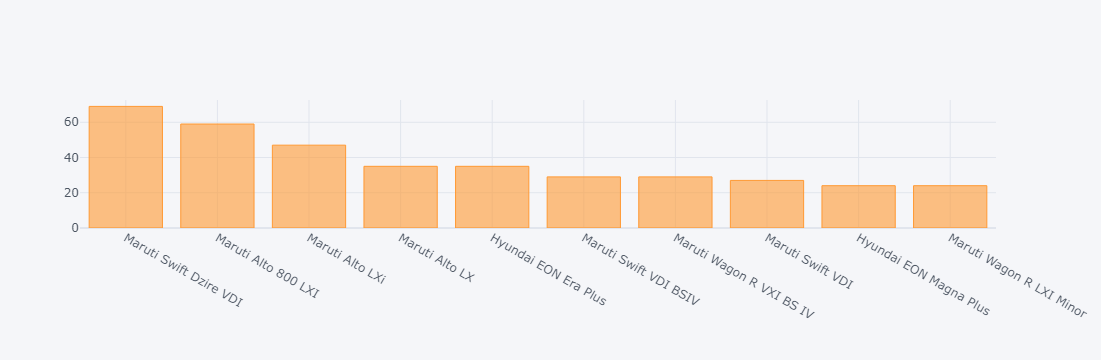

In [26]:
df["name"].value_counts().sort_values(ascending=False).head(10).iplot(kind="bar")

In [27]:
owner = df.groupby(by="owner")

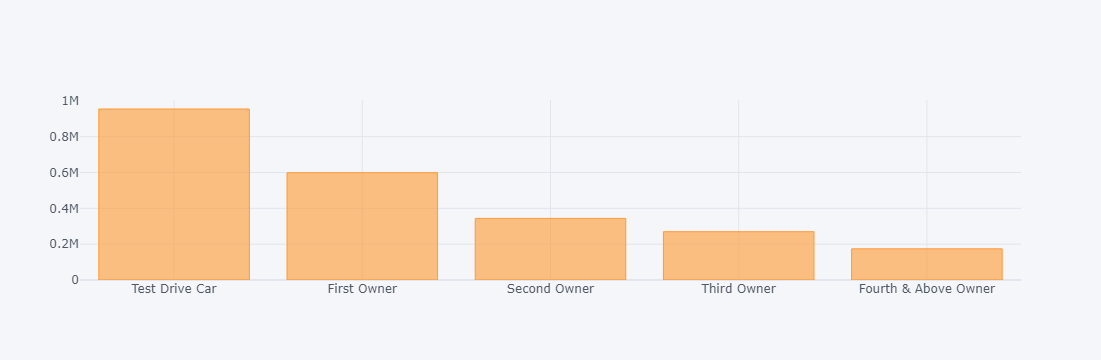

In [28]:
owner.selling_price.mean().sort_values(ascending=False).iplot(kind="bar")

C:\Users\datascience\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\datascience\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\datascience\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



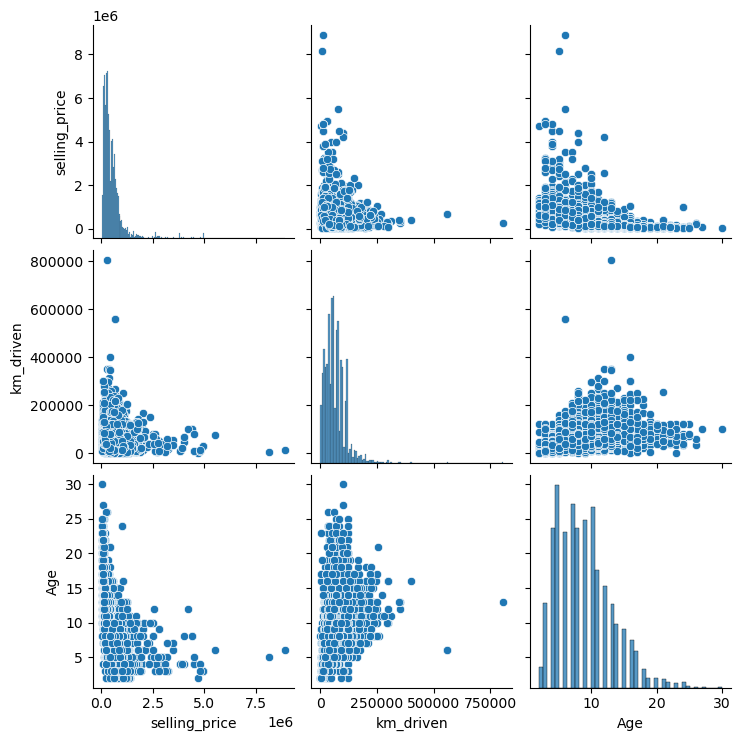

In [29]:
sns.pairplot(df)

In [30]:
df.shape

(4340, 8)

In [31]:
car_names = df["name"].unique()

In [32]:
df["name"].nunique()

1491

In [33]:
pd.DataFrame(car_names)

0
0                                         Maruti 800 AC
1                              Maruti Wagon R LXI Minor
2                                  Hyundai Verna 1.6 SX
3                                Datsun RediGO T Option
4                                 Honda Amaze VX i-DTEC
5                                  Maruti Alto LX BSIII
6                             Hyundai Xcent 1.2 Kappa S
7                              Tata Indigo Grand Petrol
8                              Hyundai Creta 1.6 VTVT S
9                              Maruti Celerio Green VXI
10                              Chevrolet Sail 1.2 Base
11                      Toyota Corolla Altis 1.8 VL CVT
12                                 Maruti Ciaz VXi Plus
13                          Hyundai Venue SX Opt Diesel
14                    Chevrolet Enjoy TCDi LTZ 7 Seater
15                           Jaguar XF 2.2 Litre Luxury
16                 Mercedes-Benz New C-Class 220 CDI AT
17                    Maruti Vitara Brezza ZDi Plus AMT
18                                      Audi Q5 2.0 TDI
19                                      Honda City V MT
20                           Tata Tigor 1.2 Revotron XT
21                      Audi A6 2.0 TDI  Design Edition
22       Mercedes-Benz New C-Class C 220 CDI Avantgarde
23                  Skoda Superb Ambition 2.0 TDI CR AT
24                            Toyota Corolla Altis G AT
25                Toyota Innova 2.5 G (Diesel) 7 Seater
26                     Jeep Compass 1.4 Sport Plus BSIV
27             Mercedes-Benz E-Class E 200 CGI Elegance
28                               Hyundai i10 Magna 1.1L
29                         BMW 3 Series 320d Sport Line
30                       Audi Q7 35 TDI Quattro Premium
31                               Hyundai Elantra CRDi S
32                            Mahindra Scorpio 1.99 S10
33                                  Honda City i DTEC V
34                    Maruti Wagon R VXI BS IV with ABS
35                             Maruti Wagon R VXI BS IV
36                                  Mahindra Scorpio LX
37                              Hyundai Santro Xing GLS
38                     Hyundai Grand i10 1.2 Kappa Asta
39                                      Maruti Alto LXi
40                      Maruti Swift Dzire VDI Optional
41                         Maruti Eeco 5 Seater AC BSIV
42                          Hyundai i20 Sportz 1.4 CRDi
43    Maruti Omni Maruti Omni MPI STD BSIII 5-STR W/...
44                                Maruti Swift ZDi BSIV
45         Hyundai i20 2015-2017 Sportz Option 1.4 CRDi
46                             Mahindra Jeep CL 500 MDI
47                                 Honda City i DTEC VX
48                                      Tata Indica DLS
49                               Hyundai EON Magna Plus
50                                      Toyota Etios GD
51        Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII
52                     Toyota Corolla Altis Diesel D4DG
53                        Mahindra Scorpio 1.99 S6 Plus
54                            Tata Indigo Classic Dicor
55                  Toyota Innova 2.5 V Diesel 8-seater
56                       Tata Indica Vista Quadrajet LS
57                                 Maruti Swift 1.3 VXi
58               Ford EcoSport 1.5 Diesel Titanium BSIV
59                                Maruti Ciaz 1.3 Delta
60                                 Honda Civic 1.8 V AT
61                               Hyundai i10 Sportz 1.2
62                         Skoda Rapid 1.5 TDI Elegance
63                                     Hyundai Getz GLS
64                                    Nissan Terrano XL
65                        Hyundai Grand i10 CRDi Sportz
66                         Hyundai Elite i20 Diesel Era
67                                 Honda Amaze S i-VTEC
68                                      Honda Brio S MT
69                          Hyundai Creta 1.6 SX Option
70    Mercedes-Benz S-Class S 350d Connoisseurs Edition
71                    

In [34]:
df["brand"] = df["name"].str.split(" ").str[0]

In [35]:
df

name  selling_price  \
0                                         Maruti 800 AC          60000   
1                              Maruti Wagon R LXI Minor         135000   
2                                  Hyundai Verna 1.6 SX         600000   
3                                Datsun RediGO T Option         250000   
4                                 Honda Amaze VX i-DTEC         450000   
5                                  Maruti Alto LX BSIII         140000   
6                             Hyundai Xcent 1.2 Kappa S         550000   
7                              Tata Indigo Grand Petrol         240000   
8                              Hyundai Creta 1.6 VTVT S         850000   
9                              Maruti Celerio Green VXI         365000   
10                              Chevrolet Sail 1.2 Base         260000   
11                             Tata Indigo Grand Petrol         250000   
12                      Toyota Corolla Altis 1.8 VL CVT        1650000   
13                                        Maruti 800 AC          60000   
14                             Maruti Wagon R LXI Minor         135000   
15                                 Hyundai Verna 1.6 SX         600000   
16                               Datsun RediGO T Option         250000   
17                                Honda Amaze VX i-DTEC         450000   
18                                 Maruti Alto LX BSIII         140000   
19                            Hyundai Xcent 1.2 Kappa S         550000   
20                             Tata Indigo Grand Petrol         240000   
21                             Hyundai Creta 1.6 VTVT S         850000   
22                             Maruti Celerio Green VXI         365000   
23                              Chevrolet Sail 1.2 Base         260000   
24                             Tata Indigo Grand Petrol         250000   
25                      Toyota Corolla Altis 1.8 VL CVT        1650000   
26                                 Maruti Ciaz VXi Plus         585000   
27                          Hyundai Venue SX Opt Diesel        1195000   
28                    Chevrolet Enjoy TCDi LTZ 7 Seater         390000   
29                           Jaguar XF 2.2 Litre Luxury        1964999   
30                 Mercedes-Benz New C-Class 220 CDI AT        1425000   
31                    Maruti Vitara Brezza ZDi Plus AMT         975000   
32                                      Audi Q5 2.0 TDI        1190000   
33                                      Honda City V MT         930000   
34                           Tata Tigor 1.2 Revotron XT         525000   
35                      Audi A6 2.0 TDI  Design Edition        1735000   
36       Mercedes-Benz New C-Class C 220 CDI Avantgarde        1375000   
37                  Skoda Superb Ambition 2.0 TDI CR AT         450000   
38                            Toyota Corolla Altis G AT         900000   
39                Toyota Innova 2.5 G (Diesel) 7 Seater        1300000   
40                     Jeep Compass 1.4 Sport Plus BSIV        1400000   
41             Mercedes-Benz E-Class E 200 CGI Elegance         850000   
42                               Hyundai i10 Magna 1.1L         229999   
43                         BMW 3 Series 320d Sport Line        1550000   
44                       Audi Q7 35 TDI Quattro Premium        1250000   
45                               Hyundai Elantra CRDi S         625000   
46                            Mahindra Scorpio 1.99 S10        1050000   
47                                  Honda City i DTEC V         560000   
48                    Maruti Wagon R VXI BS IV with ABS         290000   
49                             Maruti Wagon R VXI BS IV         275000   
50                                  Mahindra Scorpio LX         411000   
51                              Hyundai Santro Xing GLS         150000   
52                     Hyundai Grand i10 1.2 Kappa Asta         500000   
53                                      Maruti Alto LXi

In [36]:
df.brand.unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [37]:
df.brand.nunique()

29

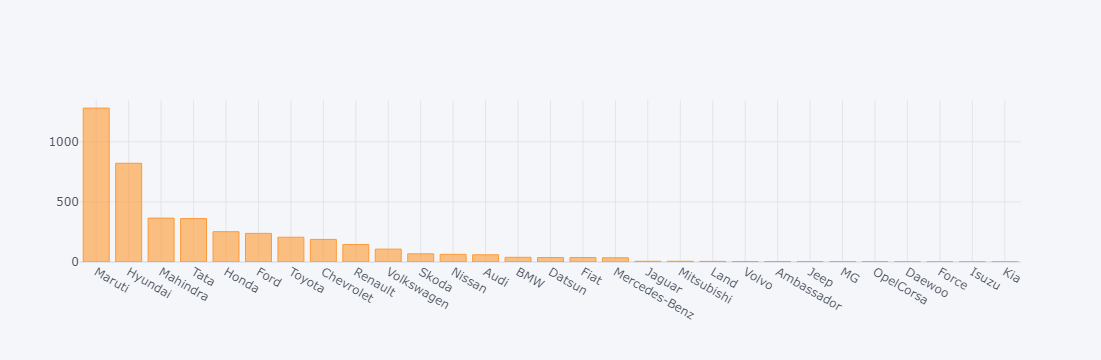

In [38]:
df.brand.value_counts().sort_values(ascending=False).iplot(kind="bar")

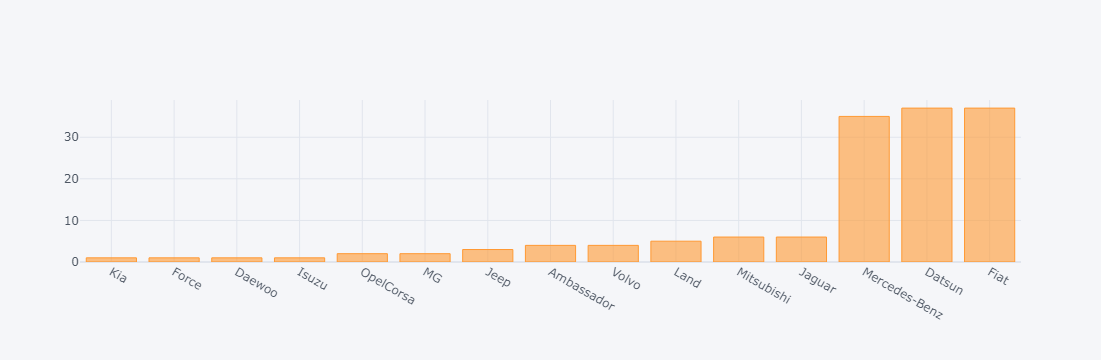

In [39]:
df.brand.value_counts().sort_values().head(15).iplot(kind="bar")

In [40]:
df[df.selling_price>2500000].sort_values(by="selling_price",ascending=False).brand.unique()

array(['Audi', 'Mercedes-Benz', 'BMW', 'Volvo', 'Land', 'Toyota', 'Ford',
       'Mahindra', 'Jaguar'], dtype=object)

In [41]:
df[df["brand"] == "Audi"]

name  selling_price  km_driven  \
32                             Audi Q5 2.0 TDI        1190000     175900   
35             Audi A6 2.0 TDI  Design Edition        1735000      50000   
44              Audi Q7 35 TDI Quattro Premium        1250000      78000   
94                Audi A6 2.0 TDI Premium Plus        1470000      34000   
96                             Audi A8 4.2 TDI        2800000      49000   
99        Audi A4 2.0 TDI 177 Bhp Premium Plus        1150000      53000   
431                            Audi Q5 2.0 TDI        1350000      90000   
554                    Audi A4 3.0 TDI Quattro        1580000      86000   
566               Audi A6 2.0 TDI Premium Plus        1300000      58500   
573                    Audi A4 3.0 TDI Quattro        1580000      86000   
585               Audi A6 2.0 TDI Premium Plus        1300000      58500   
592                    Audi A4 3.0 TDI Quattro        1580000      86000   
604               Audi A6 2.0 TDI Premium Plus        1300000      58500   
611                    Audi A4 3.0 TDI Quattro        1580000      86000   
623               Audi A6 2.0 TDI Premium Plus        1300000      58500   
721           Audi A4 New  2.0 TDI Multitronic        1549000      42215   
899                    Audi A4 3.0 TDI Quattro        1580000      86000   
911               Audi A6 2.0 TDI Premium Plus        1300000      58500   
918                    Audi A4 3.0 TDI Quattro        1580000      86000   
930               Audi A6 2.0 TDI Premium Plus        1300000      58500   
959          Audi Q3 35 TDI Quattro Technology        2700000      25000   
963                          Audi A5 Sportback        4700000       1500   
1033              Audi A6 2.0 TDI Premium Plus        1300000      58500   
1065                Audi A4 30 TFSI Technology        3100000      22000   
1077                   Audi A4 3.0 TDI Quattro        1580000      86000   
1078      Audi Q3 2.0 TDI Quattro Premium Plus        1750000     127643   
1080           Audi A6 2.0 TDI  Design Edition        1750000     102354   
1081     Audi Q5 2.0 TFSI Quattro Premium Plus        1850000      62237   
1410                    Audi A4 35 TDI Premium        2300000      35000   
1462                 Audi A8 L 3.0 TDI quattro        1250000      47000   
1479               Audi A4 35 TDI Premium Plus        3256000      17000   
1705                           Audi Q5 2.0 TDI        3500000      35000   
1835                   Audi A4 3.0 TDI Quattro        1580000      86000   
1847              Audi A6 2.0 TDI Premium Plus        1300000      58500   
2238                   Audi A4 3.0 TDI Quattro        1580000      86000   
2250              Audi A6 2.0 TDI Premium Plus        1300000      58500   
2257                   Audi A4 3.0 TDI Quattro        1580000      86000   
2269              Audi A6 2.0 TDI Premium Plus        1300000      58500   
2295        Audi Q5 3.0 TDI Quattro Technology        3899000      22000   
2323                Audi A4 30 TFSI Technology        3100000      22000   
2572              Audi A6 2.0 TDI Premium Plus        1470000      34000   
2574                           Audi A8 4.2 TDI        2800000      49000   
2578      Audi A4 2.0 TDI 177 Bhp Premium Plus        1150000      53000   
2685                  Audi Q5 2.0 TFSI Quattro        1100000     110000   
2738                   Audi A4 3.0 TDI Quattro        1580000      86000   
2750              Audi A6 2.0 TDI Premium Plus        1300000      58500   
2813      Audi Q3 2.0 TDI Quattro Premium Plus        1150000     110000   
3082                           Audi A6 2.7 TDI         850000      46000   
3094                           Audi A4 2.0 TDI        1295000      58000   
3458                          Audi A4 1.8 TFSI        1200000      60000   
3783                           Audi A6 2.8 FSI         650000      70000   
3842                   Audi A4 3.0 TDI Quattro        1580000      86000   
3843      Audi

In [42]:
top_brands=['Jaguar', 'Audi', 'BMW','Land','Mercedes-Benz', 'Volvo']
tdf = df.loc[df["brand"].isin(top_brands)]
tdf.head(10)

name  selling_price  \
29                         Jaguar XF 2.2 Litre Luxury        1964999   
30               Mercedes-Benz New C-Class 220 CDI AT        1425000   
32                                    Audi Q5 2.0 TDI        1190000   
35                    Audi A6 2.0 TDI  Design Edition        1735000   
36     Mercedes-Benz New C-Class C 220 CDI Avantgarde        1375000   
41           Mercedes-Benz E-Class E 200 CGI Elegance         850000   
43                       BMW 3 Series 320d Sport Line        1550000   
44                     Audi Q7 35 TDI Quattro Premium        1250000   
89  Mercedes-Benz S-Class S 350d Connoisseurs Edition        8150000   
94                       Audi A6 2.0 TDI Premium Plus        1470000   

    km_driven    fuel seller_type transmission         owner  Age  \
29      28000  Diesel      Dealer    Automatic   First Owner    8   
30      59000  Diesel      Dealer    Automatic   First Owner    9   
32     175900  Diesel      Dealer    Automatic   First Owner   11   
35      50000  Diesel      Dealer    Automatic   First Owner    9   
36      33800  Diesel      Dealer    Automatic  Second Owner   10   
41     119000  Petrol      Dealer    Automatic   First Owner   12   
43      75800  Diesel      Dealer    Automatic  Second Owner    9   
44      78000  Diesel      Dealer    Automatic   Third Owner   13   
89       6500  Diesel      Dealer    Automatic   First Owner    5   
94      34000  Diesel      Dealer    Automatic  Second Owner    8   

            brand  
29         Jaguar  
30  Mercedes-Benz  
32           Audi  
35           Audi  
36  Mercedes-Benz  
41  Mercedes-Benz  
43            BMW  
44           Audi  
89  Mercedes-Benz  
94           Audi

In [43]:
df.head(1)

name  selling_price  km_driven    fuel seller_type transmission  \
0  Maruti 800 AC          60000      70000  Petrol  Individual       Manual   

         owner  Age   brand  
0  First Owner   15  Maruti

In [44]:
tdf.shape

(149, 9)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
 7   Age            4340 non-null   int64 
 8   brand          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


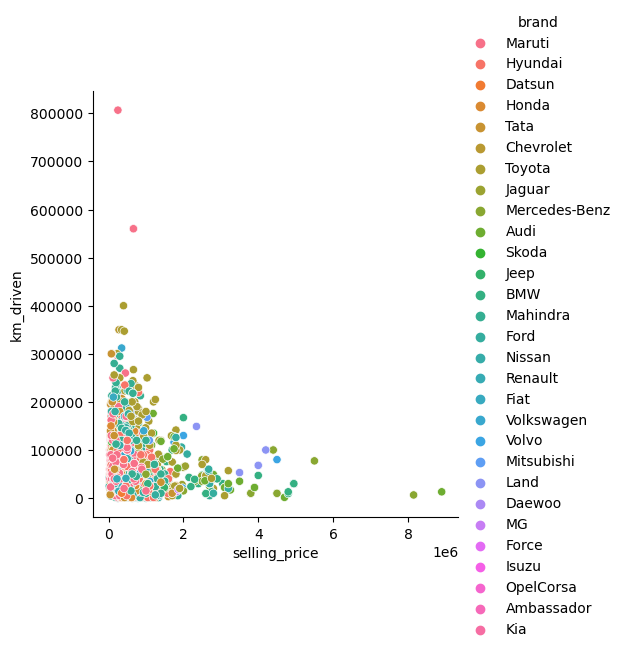

In [46]:
sns.relplot(x=df.selling_price,y=df.km_driven,hue=df.brand)

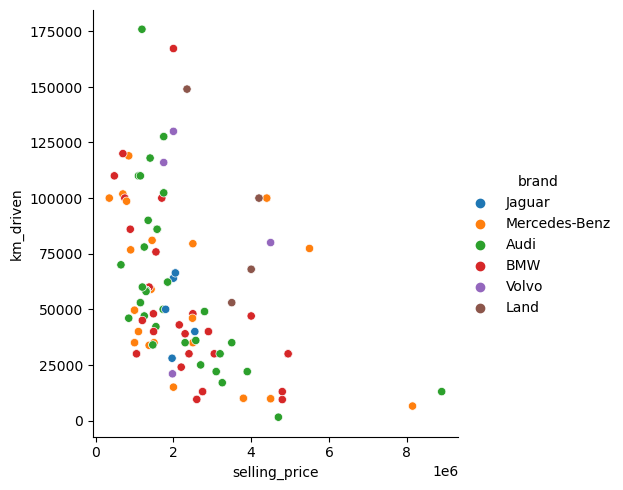

In [47]:
sns.relplot(x=tdf.selling_price,y=tdf.km_driven,hue=tdf.brand)

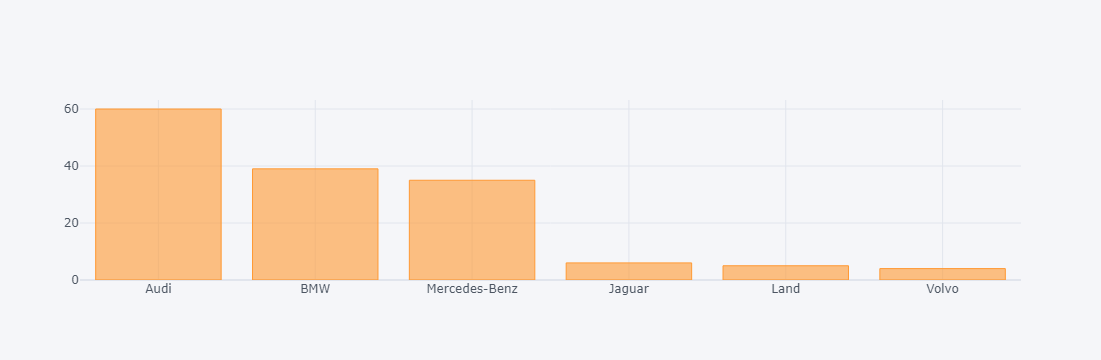

In [48]:
tdf.brand.value_counts().sort_values(ascending=False).iplot(kind="bar")

In [54]:
topcars = tdf.groupby("brand")

<Axes: ylabel='count'>

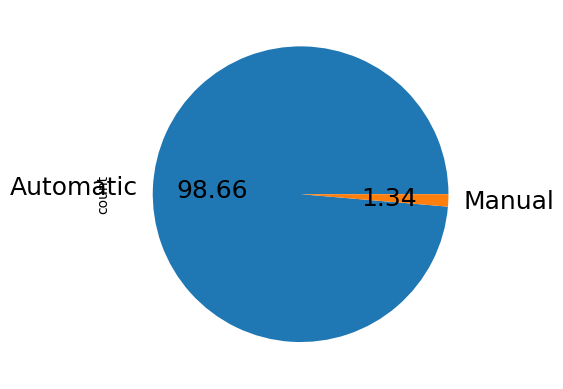

In [56]:
tdf.transmission.value_counts().plot.pie(fontsize=18,autopct="%.2f")

<Axes: ylabel='count'>

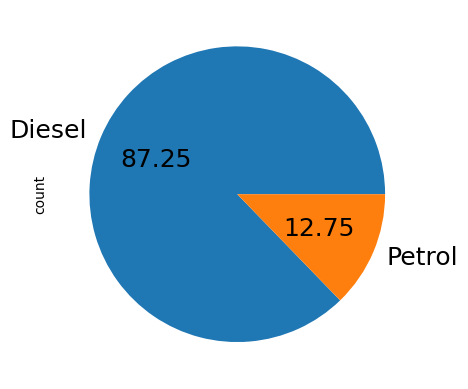

In [57]:
tdf.fuel.value_counts().plot.pie(fontsize=18,autopct ="%.2f")

<Axes: ylabel='count'>

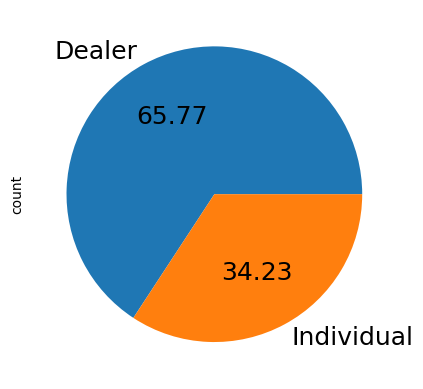

In [58]:
tdf.seller_type.value_counts().plot.pie(fontsize=18,autopct="%.2f")

In [60]:
tdf.name.value_counts

<bound method IndexOpsMixin.value_counts of 29                             Jaguar XF 2.2 Litre Luxury
30                   Mercedes-Benz New C-Class 220 CDI AT
32                                        Audi Q5 2.0 TDI
35                        Audi A6 2.0 TDI  Design Edition
36         Mercedes-Benz New C-Class C 220 CDI Avantgarde
41               Mercedes-Benz E-Class E 200 CGI Elegance
43                           BMW 3 Series 320d Sport Line
44                         Audi Q7 35 TDI Quattro Premium
89      Mercedes-Benz S-Class S 350d Connoisseurs Edition
94                           Audi A6 2.0 TDI Premium Plus
96                                        Audi A8 4.2 TDI
99                   Audi A4 2.0 TDI 177 Bhp Premium Plus
101            Mercedes-Benz E-Class Exclusive E 200 BSIV
102                               BMW X1 sDrive 20d xLine
103                                 Volvo V40 D3 R Design
105                                    BMW 7 Series 730Ld
163                       Ja